# Learning Agenda of this Notebook:
- What is Pandas and how is it used in AI?
- Key features of Pandas
- Data Types in Pandas
- What does Pandas deal with?

- Creating Series in Pandas
    - From Python List
    - From NumPy Arrays
    - From Python Dictionary
    - From a scalar value
    - Creating empty series object
- Attributes of a Pandas Series
- Arithmetic Operations on Series

- Dataframes in Pandas
    - Anatomy of a Dataframe
    - Creating Dataframe
        - An empty dataframe
        - Two-Dimensional NumPy Array
        - Dictionary of Python Lists
        - Dictionary of Panda Series
    - Attributes of a Dataframe
    - Bonus
- Different file formats in Pandas 
- Indexing, Subsetting and Slicing Dataframes
    - Practice Exercise I
- Modifying Dataframes
- Data Handling with Pandas
  - Practice Exercise I
  - Practice Exercise II
- All Statistical functions in Pandas
- Input/Output Operations
- Aggregation & Grouping
  - Practice Exercise
- Merging, Joining and Concatenation
  - Practice Exercise
- How To Perform Data Visualization with Pandas
- Exercise I
- Exercise II
- Pandas's Assignment

### Our Main Problem :
Here is dataset and find minimum temperature of each city in the dataset

In [5]:
import pandas as pd
df = pd.read_csv('datasets/groupbydata2.csv')
df

,date,city,temperature,humidity
0,01/01/2022,lahore,8,60
1,02/01/2022,lahore,10,58
2,03/01/2022,lahore,5,51
3,04/01/2022,lahore,6,49
4,05/01/2022,lahore,12,54
5,01/01/2022,karachi,18,74
6,02/01/2022,karachi,10,71
7,03/01/2022,karachi,12,78
8,04/01/2022,karachi,15,76
9,05/01/2022,karachi,16,70


In [6]:
df.min()

date           01/01/2022
city              karachi
temperature            -7
humidity               49
dtype: object

In [7]:
df.city.unique() # or df['city'].unique()

array(['lahore', 'karachi', 'murree'], dtype=object)

In [17]:
# df[df['city'] == 'lahore']['temperature'].min() # min() -> agg function

In [13]:
# find minimum temperature for each city
print(df[df['city'] == 'lahore']['temperature'].min())
print(df[df['city'] == 'karachi']['temperature'].min())
print(df[df['city'] == 'murree']['temperature'].min())

5
10
-7


In [14]:
# solution
df.groupby('city')['temperature'].min()

city
karachi    10
lahore      5
murree     -7
Name: temperature, dtype: int64

## Learning agenda of this notebook
1. Overview of Aggregation Functions and the `agg()` method
    - Applying a Built-in Aggregation Function on Entire Dataframe Object
    - Applying a Built-in Aggregation Function on a Series Object
    - Applying a User-Defined/Lambda Function on a Series Object<br><br>
2. Computing the Minimum Temperature of each City using **hard way**<br><br>
3. Computing the Minimum Temperature of each City using **`groupby`**<br><br>
4. Practice GroupBy on Stack Overflow Survey Dataset

## 1. Overview of Aggregation Functions and the `agg()` Method
- An aggregation function is one which takes multiple individual values and returns a result.

In [18]:
import pandas as pd
df = pd.read_csv('datasets/groupbydata2.csv')
df

,date,city,temperature,humidity
0,01/01/2022,lahore,8,60
1,02/01/2022,lahore,10,58
2,03/01/2022,lahore,5,51
3,04/01/2022,lahore,6,49
4,05/01/2022,lahore,12,54
5,01/01/2022,karachi,18,74
6,02/01/2022,karachi,10,71
7,03/01/2022,karachi,12,78
8,04/01/2022,karachi,15,76
9,05/01/2022,karachi,16,70


In [20]:
df.dtypes

date           object
city           object
temperature     int64
humidity        int64
dtype: object

### a. Applying a Built-in Aggregation Function on Entire Dataframe Object

In [19]:
df.min(numeric_only=True)

temperature    -7
humidity       49
dtype: int64

In [21]:
df.count()

date           15
city           15
temperature    15
humidity       15
dtype: int64

In [22]:
# Should be applied to numeric columns only, may raise a warning
df.median()

TypeError: Cannot convert [['01/01/2022' '02/01/2022' '03/01/2022' '04/01/2022' '05/01/2022'
  '01/01/2022' '02/01/2022' '03/01/2022' '04/01/2022' '05/01/2022'
  '01/01/2022' '02/01/2022' '03/01/2022' '04/01/2022' '05/01/2022']
 ['lahore' 'lahore' 'lahore' 'lahore' 'lahore' 'karachi' 'karachi'
  'karachi' 'karachi' 'karachi' 'murree' 'murree' 'murree' 'murree'
  'murree']] to numeric

In [23]:
df.median(numeric_only=True)

temperature     8.0
humidity       68.0
dtype: float64

> We can call the `agg()` method on the dataframe to apply multiple aggregation functions at a time, by passing the `agg()` function a list of aggregation functions as strings.

In [24]:
df.agg(['min', 'max',  'count'])

,date,city,temperature,humidity
min,01/01/2022,karachi,-7,49
max,05/01/2022,murree,18,78
count,15,15,15,15


In [26]:
df[df.city=='lahore'].agg(['min', 'max',  'count'])

,date,city,temperature,humidity
min,01/01/2022,lahore,5,49
max,05/01/2022,lahore,12,60
count,5,5,5,5


In [27]:
df[df.city=='lahore'].agg({'temperature':['min', 'max',  'count']})

,temperature
min,5
max,12
count,5


In [28]:
df[df.city=='lahore'].agg({'temperature':['min', 'max',  'count'],
       'humidity':['max', 'min','mean']})

,temperature,humidity
min,5.0,49.0
max,12.0,60.0
count,5.0,NaN
mean,NaN,54.4


> We can call the `describe()` method on the dataframe to get descriptive statistical measures on all its numeric columns.

In [29]:
df.describe()

,temperature,humidity
count,15.000000,15.000000
mean,6.133333,64.933333
std,8.253715,9.153194
min,-7.000000,49.000000
25%,-2.000000,59.000000
50%,8.000000,68.000000
75%,12.000000,71.500000
max,18.000000,78.000000


### b. Applying a Built-in Aggregation Function on a Series Object

In [30]:
df['temperature'].min()

-7

In [31]:
df['temperature'].max()

18

In [32]:
df['temperature'].mean()

6.133333333333334

> We can call the `agg()` method on a series to apply multiple aggregation functions at a time, by passing the `agg()` function a list of aggregation functions as strings.

In [33]:
df['temperature'].agg(['min', 'max', 'mean', 'count'])

min      -7.000000
max      18.000000
mean      6.133333
count    15.000000
Name: temperature, dtype: float64

> We can call the `describe()` method on the dataframe to get descriptive statistical measures on all its numeric columns.

In [34]:
df['temperature'].describe()

count    15.000000
mean      6.133333
std       8.253715
min      -7.000000
25%      -2.000000
50%       8.000000
75%      12.000000
max      18.000000
Name: temperature, dtype: float64

### c. Applying a User-Defined/Lambda Function on a Series Object using the `apply()` Method
- We have used this `apply()` method before as well that is used to invoke function on values of Series and return a resulting series.

In [35]:
df.temperature

0      8
1     10
2      5
3      6
4     12
5     18
6     10
7     12
8     15
9     16
10    -5
11    -3
12    -4
13    -1
14    -7
Name: temperature, dtype: int64

In [36]:
def ctof(x):
    return x*9/5+32

In [37]:
df.temperature.apply(ctof)

0     46.4
1     50.0
2     41.0
3     42.8
4     53.6
5     64.4
6     50.0
7     53.6
8     59.0
9     60.8
10    23.0
11    26.6
12    24.8
13    30.2
14    19.4
Name: temperature, dtype: float64

In [38]:
df.temperature.apply(lambda x: x*9/5+32)

0     46.4
1     50.0
2     41.0
3     42.8
4     53.6
5     64.4
6     50.0
7     53.6
8     59.0
9     60.8
10    23.0
11    26.6
12    24.8
13    30.2
14    19.4
Name: temperature, dtype: float64

# How to Compute the Minimum Temperature of Each City?

## 2. Doing it the Hard Way
<img align="center" width="700" height="500"  src="images/groupbyfinal.png"  >

In [39]:
import pandas as pd
df = pd.read_csv('datasets/groupbydata1.csv')
df

,date,city,temperature
0,01/01/2022,lahore,8
1,02/01/2022,lahore,10
2,03/01/2022,lahore,5
3,04/01/2022,lahore,6
4,05/01/2022,lahore,12
5,01/01/2022,karachi,18
6,02/01/2022,karachi,10
7,03/01/2022,karachi,12
8,04/01/2022,karachi,15
9,05/01/2022,karachi,16


### a. Splitting the Dataframe
- We need to use conditional selection technique, in which we pass a Boolean mask for the appropriate city column to be selected. Can do it using two ways:
    - Using `df[]` subscript operator
    - Using `df.loc` method

In [40]:
df[df['city']=='karachi']

,date,city,temperature
5,01/01/2022,karachi,18
6,02/01/2022,karachi,10
7,03/01/2022,karachi,12
8,04/01/2022,karachi,15
9,05/01/2022,karachi,16


In [44]:
# df[df['city']=='lahore']
df.loc[df.city=='lahore', :]

,date,city,temperature
0,01/01/2022,lahore,8
1,02/01/2022,lahore,10
2,03/01/2022,lahore,5
3,04/01/2022,lahore,6
4,05/01/2022,lahore,12


In [45]:
# df[df['city']=='karachi']
df.loc[df.city=='karachi', :]

,date,city,temperature
5,01/01/2022,karachi,18
6,02/01/2022,karachi,10
7,03/01/2022,karachi,12
8,04/01/2022,karachi,15
9,05/01/2022,karachi,16


In [46]:
# df[df['city']=='murree']
df.loc[df.city=='murree', :]

,date,city,temperature
10,01/01/2022,murree,-5
11,02/01/2022,murree,-3
12,03/01/2022,murree,-4
13,04/01/2022,murree,-1
14,05/01/2022,murree,-7


>**Limitation:**
>- We have to repeat this process for every city separately.
>- What if there are over 100 cities in the dataset?

### b. Applying the `min()` Function
- We need to apply the `min()` function on the temperature column of all of the above dataframes separately

In [47]:
df.loc[df.city=='lahore', :].temperature.min()

5

In [48]:
df.loc[df.city=='karachi', :].temperature.min()

10

In [49]:
df.loc[df.city=='murree', :].temperature.min()

-7

>**Limitation:**
>- We have to repeat this process for every city separately.
>- What if there are over 100 cities in the dataset?

### c. Combining the Result
- Since, we have got the minimum temperature of all the cities, we need to combine them to an appropriate series object to be used for later processing.

In [50]:
lhr = df.loc[df.city=='lahore', :].temperature.min()
kci = df.loc[df.city=='karachi', :].temperature.min()
murree = df.loc[df.city=='murree', :].temperature.min()

s = pd.Series(data=[lhr, kci, murree], index=['L_min', 'K_min', 'M_min'] )
s.name= 'Min Temperatures'
s

L_min     5
K_min    10
M_min    -7
Name: Min Temperatures, dtype: int64

# How to Compute the Minimum Temperature of Each City?

## 3. An Elegant Way
<img align="center" width="700" height="500"  src="images/groupbyfinal.png"  >

In [51]:
import pandas as pd
df = pd.read_csv('datasets/groupbydata1.csv')
df

,date,city,temperature
0,01/01/2022,lahore,8
1,02/01/2022,lahore,10
2,03/01/2022,lahore,5
3,04/01/2022,lahore,6
4,05/01/2022,lahore,12
5,01/01/2022,karachi,18
6,02/01/2022,karachi,10
7,03/01/2022,karachi,12
8,04/01/2022,karachi,15
9,05/01/2022,karachi,16


### a. Step 1: Split Step
- In the split step we divide the data inside the dataframe into multiple groups
- Since we need to calculate the minimum temperature of each city, therefore, we will use `groupby()` method on the `city` column of the dataframe.
- This will result a DataFrameGroupBy object, which is an iterable containing multiple small dataframes based on the `by` argument passed to the `groupby()` method

In [52]:
dfgb = df.groupby('city')
dfgb

>- Since this is an iterable, so let us iterate :)

In [54]:
for mydf in dfgb:
    print(mydf)
    print("\n\n")

('karachi',          date     city  temperature
5  01/01/2022  karachi           18
6  02/01/2022  karachi           10
7  03/01/2022  karachi           12
8  04/01/2022  karachi           15
9  05/01/2022  karachi           16)



('lahore',          date    city  temperature
0  01/01/2022  lahore            8
1  02/01/2022  lahore           10
2  03/01/2022  lahore            5
3  04/01/2022  lahore            6
4  05/01/2022  lahore           12)



('murree',           date    city  temperature
10  01/01/2022  murree           -5
11  02/01/2022  murree           -3
12  03/01/2022  murree           -4
13  04/01/2022  murree           -1
14  05/01/2022  murree           -7)





>- To display indices of every group in the dataframe, use `groups` attribute of  `DataFrameGroupBy` object.
>- Returns a Dictionary object (PrettyDict) with keys as the group value and value as list of corresponding row indices

In [55]:
dfgb.groups   # df.groupby('city').groups

{'karachi': [5, 6, 7, 8, 9], 'lahore': [0, 1, 2, 3, 4], 'murree': [10, 11, 12, 13, 14]}

>- To display records of a specific group, use `get_group()` method on `DataFrameGroupBy` object.
>- Construct and return DataFrame from `DataFrameGroupBy` object  with provided name.

In [56]:
# Display DataFrame of a specific group from groupby object by providing the specific group value
dfgb.get_group('murree') # df.groupby('city').get_group('karachi') 

,date,city,temperature
10,01/01/2022,murree,-5
11,02/01/2022,murree,-3
12,03/01/2022,murree,-4
13,04/01/2022,murree,-1
14,05/01/2022,murree,-7


>- To find the size of each group, use `size()` method of DataFrameGroupBy object.
>- It return a series containing number of rows in each each group of the DataFrameGroupBy object as a Series

In [57]:
dfgb.size()  #df.groupby('city').size()

city
karachi    5
lahore     5
murree     5
dtype: int64

> After understanding the `groupby()` method let us move to step 2, and that is `Applying a Function`

### b. Step 2: Apply Step
- Now second step is that we apply appropriate aggregate function on all the groups inside the DataFrameGroupBy object

**Let us first apply aggregate function on a specific column of `DataFrameGroupBy` object, which is a `SeriesGroupBy` object**

In [58]:
df

,date,city,temperature
0,01/01/2022,lahore,8
1,02/01/2022,lahore,10
2,03/01/2022,lahore,5
3,04/01/2022,lahore,6
4,05/01/2022,lahore,12
5,01/01/2022,karachi,18
6,02/01/2022,karachi,10
7,03/01/2022,karachi,12
8,04/01/2022,karachi,15
9,05/01/2022,karachi,16


In [59]:
df.groupby('city')

In [60]:
df.groupby('city').get_group('lahore')

,date,city,temperature
0,01/01/2022,lahore,8
1,02/01/2022,lahore,10
2,03/01/2022,lahore,5
3,04/01/2022,lahore,6
4,05/01/2022,lahore,12


In [61]:
df.groupby('city').get_group('lahore').temperature

0     8
1    10
2     5
3     6
4    12
Name: temperature, dtype: int64

In [62]:
df.groupby('city').get_group('lahore').temperature.min()

5

In [63]:
df.groupby('city').get_group('karachi').temperature.min()

10

In [64]:
df.groupby('city').get_group('murree').temperature.min()

-7

### b. Step 3: Combine Step
- Now we have got minimum temperature of all the three cities, let us combine the result into a series object

In [65]:
kci = df.groupby('city').get_group('karachi').temperature.min()
lhr = df.groupby('city').get_group('lahore').temperature.min()
murree = df.groupby('city').get_group('murree').temperature.min()

s1 = pd.Series(data=[kci, lhr, murree], index=['K_min', 'L_min', 'M_min'] )
s1.name= 'Min Temperatures'
s1

K_min    10
L_min     5
M_min    -7
Name: Min Temperatures, dtype: int64

>- **Let us perform the `apply + combine` steps in one go, by applying the `min()` function on the temperature series of all the dataframes inside the DataFrameGroupBy object.**
>- **This saves us from the hassle of applying `min()` method explicitly as done above**

In [66]:
df.groupby('city')

In [67]:
df.groupby('city').temperature

In [68]:
df.groupby('city').temperature.min()

city
karachi    10
lahore      5
murree     -7
Name: temperature, dtype: int64

In [69]:
df.columns

Index(['date', 'city', 'temperature'], dtype='object')

In [70]:
# df.groupby('city')['temperature','humidity'].agg(['count','max','min','mean'])

>- **We can also apply `agg()` method on the temperature series of all the dataframes inside the DataFrameGroupBy object**

In [71]:
df.groupby('city').temperature.agg(['min', 'max', 'sum', 'mean'])

,min,max,sum,mean
city,,,,
karachi,10,18,71,14.2
lahore,5,12,41,8.2
murree,-7,-1,-20,-4.0


>Note that we have got a dataframe this time.

## 4. Practice GroupBy on Stack Overflow Survey Dataset
Visit to Download Data: https://insights.stackoverflow.com/survey/

In [2]:
!ls datasets

Euro_2012_stats_TEAM.csv    recent-grads.csv
groupbydata1.csv            so_survey_subset.csv
groupbydata2.csv            so_survey_subset_schema.csv
groupdata.csv               u.user


### a. Understand the Data Set

In [133]:
import pandas as pd
df = pd.read_csv('datasets/so_survey_subset.csv', index_col='Respondent')
df.shape

(88883, 9)

In [4]:
df.head()

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
1,I am a student who is learning to code,Yes,United Kingdom,4,NaN,HTML/CSS;Java;JavaScript;Python,Twitter,14.0,Man
2,I am a student who is learning to code,No,Bosnia and Herzegovina,NaN,NaN,C++;HTML/CSS;Python,Instagram,19.0,Man
3,"I am not primarily a developer, but I write co...",Yes,Thailand,3,8820.0,HTML/CSS,Reddit,28.0,Man
4,I am a developer by profession,No,United States,3,61000.0,C;C++;C#;Python;SQL,Reddit,22.0,Man
5,I am a developer by profession,Yes,Ukraine,16,NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Facebook,30.0,Man


In [75]:
df.columns

Index(['MainBranch', 'Hobbyist', 'Country', 'YearsCode', 'ConvertedComp',
       'LanguageWorkedWith', 'SocialMedia', 'Age', 'Gender'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88883 entries, 1 to 88863
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MainBranch          88331 non-null  object 
 1   Hobbyist            88883 non-null  object 
 2   Country             88751 non-null  object 
 3   YearsCode           87938 non-null  object 
 4   ConvertedComp       55823 non-null  float64
 5   LanguageWorkedWith  87569 non-null  object 
 6   SocialMedia         84437 non-null  object 
 7   Age                 79210 non-null  float64
 8   Gender              85406 non-null  object 
dtypes: float64(2), object(7)
memory usage: 6.8+ MB


In [77]:
df.isna().sum()

MainBranch              552
Hobbyist                  0
Country                 132
YearsCode               945
ConvertedComp         33060
LanguageWorkedWith     1314
SocialMedia            4446
Age                    9673
Gender                 3477
dtype: int64

In [78]:
df.Country

Respondent
1                United Kingdom
2        Bosnia and Herzegovina
3                      Thailand
4                 United States
5                       Ukraine
                  ...          
88377                    Canada
88601                       NaN
88802                       NaN
88816                       NaN
88863                     Spain
Name: Country, Length: 88883, dtype: object

In [79]:
# First method
df[df.Country =='Pakistan']

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
84,I am a developer by profession,No,Pakistan,3,3468.0,C;C++;C#;Java;Kotlin;PHP;SQL,WhatsApp,26.0,Man
119,I am a developer by profession,No,Pakistan,10,NaN,C;C++;C#;HTML/CSS;Java;JavaScript;SQL,Facebook,28.0,Man
298,I am a developer by profession,Yes,Pakistan,4,NaN,HTML/CSS;JavaScript;PHP;SQL;Other(s):,LinkedIn,23.0,Man
299,I am a developer by profession,Yes,Pakistan,19,NaN,Assembly;C;C++;Java;Python;SQL,Facebook,25.0,Man
311,I am a developer by profession,No,Pakistan,5,2600.0,Assembly;C;C++;C#;HTML/CSS;Java;Python;Scala;SQL,LinkedIn,24.0,Man
...,...,...,...,...,...,...,...,...,...
88862,I am a student who is learning to code,Yes,Pakistan,3,NaN,Java,WhatsApp,21.0,Man
5439,NaN,Yes,Pakistan,2,NaN,NaN,Instagram,24.0,Woman
39117,NaN,Yes,Pakistan,4,NaN,C;C++;C#;HTML/CSS;Java;JavaScript;SQL,WhatsApp,22.0,Man


In [80]:
df.loc[df['Country']=='Pakistan', :]

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
84,I am a developer by profession,No,Pakistan,3,3468.0,C;C++;C#;Java;Kotlin;PHP;SQL,WhatsApp,26.0,Man
119,I am a developer by profession,No,Pakistan,10,NaN,C;C++;C#;HTML/CSS;Java;JavaScript;SQL,Facebook,28.0,Man
298,I am a developer by profession,Yes,Pakistan,4,NaN,HTML/CSS;JavaScript;PHP;SQL;Other(s):,LinkedIn,23.0,Man
299,I am a developer by profession,Yes,Pakistan,19,NaN,Assembly;C;C++;Java;Python;SQL,Facebook,25.0,Man
311,I am a developer by profession,No,Pakistan,5,2600.0,Assembly;C;C++;C#;HTML/CSS;Java;Python;Scala;SQL,LinkedIn,24.0,Man
...,...,...,...,...,...,...,...,...,...
88862,I am a student who is learning to code,Yes,Pakistan,3,NaN,Java,WhatsApp,21.0,Man
5439,NaN,Yes,Pakistan,2,NaN,NaN,Instagram,24.0,Woman
39117,NaN,Yes,Pakistan,4,NaN,C;C++;C#;HTML/CSS;Java;JavaScript;SQL,WhatsApp,22.0,Man


#### Question: Drop all the rows where any element is missing?

In [13]:
df.shape

(88883, 9)

In [12]:
# df.isna()
import numpy as np
# df.where(np.nan)
# df.loc[df.isna(),:]
df.dropna()

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
3,"I am not primarily a developer, but I write co...",Yes,Thailand,3,8820.0,HTML/CSS,Reddit,28.0,Man
4,I am a developer by profession,No,United States,3,61000.0,C;C++;C#;Python;SQL,Reddit,22.0,Man
6,"I am not primarily a developer, but I write co...",Yes,Canada,13,366420.0,Java;R;SQL,YouTube,28.0,Man
9,I am a developer by profession,Yes,New Zealand,12,95179.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Twitter,23.0,Man
13,I am a developer by profession,Yes,United States,17,90000.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Twitter,28.0,Man
...,...,...,...,...,...,...,...,...,...
88876,I am a developer by profession,Yes,United States,8,180000.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...,Reddit,23.0,Man
88877,I am a developer by profession,Yes,United States,31,2000000.0,Bash/Shell/PowerShell;C;Clojure;HTML/CSS;Java;...,Facebook,48.0,Man
88878,I am a developer by profession,Yes,United States,12,130000.0,HTML/CSS;JavaScript;Scala;TypeScript,Twitter,26.0,Man


In [81]:
import pandas as pd
schema = pd.read_csv('datasets/so_survey_subset_schema.csv', index_col='Column')
schema

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Country,In which country do you currently reside?
YearsCode,"Including any education, how many years have y..."
ConvertedComp,Salary converted to annual USD salaries using ...
LanguageWorkedWith,"Which of the following programming, scripting,..."
SocialMedia,What social media site do you use the most?
Age,What is your age (in years)? If you prefer not...


In [82]:
schema.loc['Hobbyist']

QuestionText    Do you code as a hobby?
Name: Hobbyist, dtype: object

In [83]:
df['Hobbyist']

Respondent
1        Yes
2         No
3        Yes
4         No
5        Yes
        ... 
88377    Yes
88601     No
88802     No
88816     No
88863    Yes
Name: Hobbyist, Length: 88883, dtype: object

In [84]:
schema.loc['Country']

QuestionText    In which country do you currently reside?
Name: Country, dtype: object

In [85]:
df['Country']

Respondent
1                United Kingdom
2        Bosnia and Herzegovina
3                      Thailand
4                 United States
5                       Ukraine
                  ...          
88377                    Canada
88601                       NaN
88802                       NaN
88816                       NaN
88863                     Spain
Name: Country, Length: 88883, dtype: object

In [86]:
schema.loc['ConvertedComp']

QuestionText    Salary converted to annual USD salaries using ...
Name: ConvertedComp, dtype: object

In [87]:
df['ConvertedComp']

Respondent
1            NaN
2            NaN
3         8820.0
4        61000.0
5            NaN
          ...   
88377        NaN
88601        NaN
88802        NaN
88816        NaN
88863        NaN
Name: ConvertedComp, Length: 88883, dtype: float64

In [88]:
schema.loc['LanguageWorkedWith']

QuestionText    Which of the following programming, scripting,...
Name: LanguageWorkedWith, dtype: object

In [89]:
!cat datasets/so_survey_subset_schema.csv

Column,QuestionText
Respondent,Randomized respondent ID number (not in order of survey response time)
MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
Hobbyist,Do you code as a hobby?
Country,In which country do you currently reside?
YearsCode,"Including any education, how many years have you been coding?"
ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks."
LanguageWorkedWith,"Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
SocialMedia,What social media site do you use the most?
Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank.

In [90]:
df['LanguageWorkedWith']

Respondent
1                          HTML/CSS;Java;JavaScript;Python
2                                      C++;HTML/CSS;Python
3                                                 HTML/CSS
4                                      C;C++;C#;Python;SQL
5              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88377                        HTML/CSS;JavaScript;Other(s):
88601                                                  NaN
88802                                                  NaN
88816                                                  NaN
88863    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [91]:
schema.loc['SocialMedia']

QuestionText    What social media site do you use the most?
Name: SocialMedia, dtype: object

In [92]:
df['SocialMedia']

Respondent
1          Twitter
2        Instagram
3           Reddit
4           Reddit
5         Facebook
           ...    
88377      YouTube
88601          NaN
88802          NaN
88816          NaN
88863     WhatsApp
Name: SocialMedia, Length: 88883, dtype: object

In [93]:
df.dtypes

MainBranch             object
Hobbyist               object
Country                object
YearsCode              object
ConvertedComp         float64
LanguageWorkedWith     object
SocialMedia            object
Age                   float64
Gender                 object
dtype: object

##### Let us perform some basic statistical analysis on the Dataset

In [94]:
# Returns the count of non-NA values for a series object.
df['Hobbyist'].count()

88883

In [95]:
# Returns a Series containing counts of unique rows.
df['Hobbyist'].value_counts()

Hobbyist
Yes    71257
No     17626
Name: count, dtype: int64

In [96]:
# Returns the count of non-NA values for a series object.
df['Country'].count()

88751

In [97]:
# Returns a Series containing counts of unique rows.
df['Country'].value_counts()

Country
United States        20949
India                 9061
Germany               5866
United Kingdom        5737
Canada                3395
                     ...  
Tonga                    1
Timor-Leste              1
North Korea              1
Brunei Darussalam        1
Chad                     1
Name: count, Length: 179, dtype: int64

In [98]:
df['SocialMedia'].value_counts()

SocialMedia
Reddit                      14374
YouTube                     13830
WhatsApp                    13347
Facebook                    13178
Twitter                     11398
Instagram                    6261
I don't use social media     5554
LinkedIn                     4501
WeChat 微信                     667
Snapchat                      628
VK ВКонта́кте                 603
Weibo 新浪微博                     56
Youku Tudou 优酷                 21
Hello                          19
Name: count, dtype: int64

In [99]:
df['Gender'].value_counts()

Gender
Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: count, dtype: int64

### To get the count of countries whose developers participated in the survey

In [100]:
df['Country'].value_counts().count()

179

In [101]:
# Returns the count of non-NA values for a series object.
df['ConvertedComp'].count()

55823

In [102]:
# Returns a Series containing counts of unique rows.
df['ConvertedComp'].value_counts()

ConvertedComp
2000000.0    709
1000000.0    558
120000.0     502
100000.0     480
150000.0     434
            ... 
411096.0       1
261228.0       1
82322.0        1
66424.0        1
588012.0       1
Name: count, Length: 9162, dtype: int64

In [103]:
df['ConvertedComp'].mean()

127110.73842323056

In [104]:
df['ConvertedComp'].median()

57287.0

In [105]:
df.describe()

,ConvertedComp,Age
count,5.582300e+04,79210.000000
mean,1.271107e+05,30.336699
std,2.841523e+05,9.178390
min,0.000000e+00,1.000000
25%,2.577750e+04,24.000000
50%,5.728700e+04,29.000000
75%,1.000000e+05,35.000000
max,2.000000e+06,99.000000


<h1 align="center">Let us try answering certain Questions</h1>

##  Question 1: 
>**List the most popular SocialMedia web site for every Country**

**Let us first  do the easy task, and that is to list the most popular SocialMedia website of a single country (lets say Pakistan)**

In [14]:
df[df.Country=='Pakistan']

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
84,I am a developer by profession,No,Pakistan,3,3468.0,C;C++;C#;Java;Kotlin;PHP;SQL,WhatsApp,26.0,Man
119,I am a developer by profession,No,Pakistan,10,NaN,C;C++;C#;HTML/CSS;Java;JavaScript;SQL,Facebook,28.0,Man
298,I am a developer by profession,Yes,Pakistan,4,NaN,HTML/CSS;JavaScript;PHP;SQL;Other(s):,LinkedIn,23.0,Man
299,I am a developer by profession,Yes,Pakistan,19,NaN,Assembly;C;C++;Java;Python;SQL,Facebook,25.0,Man
311,I am a developer by profession,No,Pakistan,5,2600.0,Assembly;C;C++;C#;HTML/CSS;Java;Python;Scala;SQL,LinkedIn,24.0,Man
...,...,...,...,...,...,...,...,...,...
88862,I am a student who is learning to code,Yes,Pakistan,3,NaN,Java,WhatsApp,21.0,Man
5439,NaN,Yes,Pakistan,2,NaN,NaN,Instagram,24.0,Woman
39117,NaN,Yes,Pakistan,4,NaN,C;C++;C#;HTML/CSS;Java;JavaScript;SQL,WhatsApp,22.0,Man


In [15]:
df.loc[df.Country=='Pakistan', 'SocialMedia']

Respondent
84        WhatsApp
119       Facebook
298       LinkedIn
299       Facebook
311       LinkedIn
           ...    
88862     WhatsApp
5439     Instagram
39117     WhatsApp
60066      YouTube
88182      Twitter
Name: SocialMedia, Length: 923, dtype: object

In [16]:
df.loc[df.Country=='Pakistan', 'SocialMedia'].value_counts()

SocialMedia
WhatsApp                    266
Facebook                    232
YouTube                     182
LinkedIn                     71
Twitter                      58
Instagram                    41
Reddit                       28
I don't use social media     23
Snapchat                      5
Hello                         1
VK ВКонта́кте                 1
Name: count, dtype: int64

In [ ]:
df.columns

In [17]:
df.groupby('Country').get_group('Pakistan')

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
84,I am a developer by profession,No,Pakistan,3,3468.0,C;C++;C#;Java;Kotlin;PHP;SQL,WhatsApp,26.0,Man
119,I am a developer by profession,No,Pakistan,10,NaN,C;C++;C#;HTML/CSS;Java;JavaScript;SQL,Facebook,28.0,Man
298,I am a developer by profession,Yes,Pakistan,4,NaN,HTML/CSS;JavaScript;PHP;SQL;Other(s):,LinkedIn,23.0,Man
299,I am a developer by profession,Yes,Pakistan,19,NaN,Assembly;C;C++;Java;Python;SQL,Facebook,25.0,Man
311,I am a developer by profession,No,Pakistan,5,2600.0,Assembly;C;C++;C#;HTML/CSS;Java;Python;Scala;SQL,LinkedIn,24.0,Man
...,...,...,...,...,...,...,...,...,...
88862,I am a student who is learning to code,Yes,Pakistan,3,NaN,Java,WhatsApp,21.0,Man
5439,NaN,Yes,Pakistan,2,NaN,NaN,Instagram,24.0,Woman
39117,NaN,Yes,Pakistan,4,NaN,C;C++;C#;HTML/CSS;Java;JavaScript;SQL,WhatsApp,22.0,Man


In [22]:
df.groupby('Country').get_group('China').loc[:,'SocialMedia'].value_counts()

SocialMedia
WeChat 微信                   403
YouTube                      53
Weibo 新浪微博                   42
I don't use social media     27
Twitter                      27
Reddit                       12
LinkedIn                     11
Facebook                      8
Instagram                     7
Youku Tudou 优酷                7
WhatsApp                      3
VK ВКонта́кте                 1
Name: count, dtype: int64

In [19]:
# df.loc[df.Country =='Pakistan', :]
# df.loc[df.Country =='Pakistan', 'SocialMedia'].head(10)
# df.loc[df.Country =='Pakistan', 'SocialMedia'].value_counts()
# df.loc[df.Country =='Pakistan', 'SocialMedia'].value_counts(normalize=True)
# df.loc[df.Country =='Germany', 'SocialMedia'].value_counts()

In [23]:
df.groupby('Country')

In [ ]:
df.groupby('Country').get_group("Pakistan").head()

In [ ]:
df.groupby('Country').get_group("Pakistan").loc[:, 'SocialMedia']

In [ ]:
df.groupby('Country').get_group("Pakistan").loc[:, 'SocialMedia'].value_counts()

In [25]:
df.groupby('Country')['SocialMedia'].value_counts().head(20)

Country      SocialMedia             
Afghanistan  Facebook                    15
             YouTube                      9
             I don't use social media     6
             WhatsApp                     4
             Instagram                    1
             LinkedIn                     1
             Twitter                      1
Albania      WhatsApp                    18
             Facebook                    16
             Instagram                   13
             YouTube                     10
             Twitter                      8
             LinkedIn                     7
             Reddit                       6
             I don't use social media     4
             Snapchat                     1
             WeChat 微信                    1
Algeria      YouTube                     42
             Facebook                    41
             Twitter                     14
Name: count, dtype: int64

In [26]:
df.groupby('Country')['SocialMedia'].value_counts().tail(20)

Country   SocialMedia
Viet Nam  WhatsApp        3
          LinkedIn        3
          Hello           1
Yemen     WhatsApp        8
          Facebook        5
          YouTube         5
          Twitter         1
Zambia    Facebook        4
          WhatsApp        2
          Twitter         2
          YouTube         2
          Reddit          1
          LinkedIn        1
Zimbabwe  WhatsApp       20
          Twitter         8
          Facebook        3
          YouTube         3
          LinkedIn        2
          Instagram       2
          Reddit          1
Name: count, dtype: int64

In [27]:
df.groupby('Country')['SocialMedia'].value_counts().head(30)

Country      SocialMedia             
Afghanistan  Facebook                    15
             YouTube                      9
             I don't use social media     6
             WhatsApp                     4
             Instagram                    1
             LinkedIn                     1
             Twitter                      1
Albania      WhatsApp                    18
             Facebook                    16
             Instagram                   13
             YouTube                     10
             Twitter                      8
             LinkedIn                     7
             Reddit                       6
             I don't use social media     4
             Snapchat                     1
             WeChat 微信                    1
Algeria      YouTube                     42
             Facebook                    41
             Twitter                     14
             LinkedIn                     9
             Instagram                

In [41]:
df.groupby('Country')['SocialMedia'].apply(lambda x:x.value_counts().idxmax()).head(30)

Country
Afghanistan                               Facebook
Albania                                   WhatsApp
Algeria                                    YouTube
Andorra                   I don't use social media
Angola                                     Twitter
Antigua and Barbuda                        YouTube
Argentina                                 WhatsApp
Armenia                                   Facebook
Australia                                   Reddit
Austria                                   WhatsApp
Azerbaijan                                 YouTube
Bahamas                                    Twitter
Bahrain                                   WhatsApp
Bangladesh                                Facebook
Barbados                                   Twitter
Belarus                                    YouTube
Belgium                                     Reddit
Belize                                    Facebook
Benin                                     WhatsApp
Bhutan                 

In [44]:
df.groupby('Country')['SocialMedia'].apply(lambda x:x.value_counts().idxmax())

Country
Afghanistan                                             Facebook
Albania                                                 WhatsApp
Algeria                                                  YouTube
Andorra                                 I don't use social media
Angola                                                   Twitter
                                                  ...           
Venezuela, Bolivarian Republic of...                    WhatsApp
Viet Nam                                                Facebook
Yemen                                                   WhatsApp
Zambia                                                  Facebook
Zimbabwe                                                WhatsApp
Name: SocialMedia, Length: 179, dtype: object

##  Question 2: 
>**What percentage of people in each country knows Python programming?**

**tc** = Total count of people from each country who participated in the survey?

**pc** = Python People: Count of people from each country who knows Python

**tc (option 1):**

In [45]:
df

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
1,I am a student who is learning to code,Yes,United Kingdom,4,NaN,HTML/CSS;Java;JavaScript;Python,Twitter,14.0,Man
2,I am a student who is learning to code,No,Bosnia and Herzegovina,NaN,NaN,C++;HTML/CSS;Python,Instagram,19.0,Man
3,"I am not primarily a developer, but I write co...",Yes,Thailand,3,8820.0,HTML/CSS,Reddit,28.0,Man
4,I am a developer by profession,No,United States,3,61000.0,C;C++;C#;Python;SQL,Reddit,22.0,Man
5,I am a developer by profession,Yes,Ukraine,16,NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Facebook,30.0,Man
...,...,...,...,...,...,...,...,...,...
88377,NaN,Yes,Canada,NaN,NaN,HTML/CSS;JavaScript;Other(s):,YouTube,NaN,Man
88601,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88802,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.loc[:, 'Country']

Respondent
1                United Kingdom
2        Bosnia and Herzegovina
3                      Thailand
4                 United States
5                       Ukraine
                  ...          
88377                    Canada
88601                       NaN
88802                       NaN
88816                       NaN
88863                     Spain
Name: Country, Length: 88883, dtype: object

In [47]:
tc = df['Country'].value_counts()
tc.name = 'Total'
tc

Country
United States        20949
India                 9061
Germany               5866
United Kingdom        5737
Canada                3395
                     ...  
Tonga                    1
Timor-Leste              1
North Korea              1
Brunei Darussalam        1
Chad                     1
Name: Total, Length: 179, dtype: int64

In [49]:
tc['Pakistan']

923

**tc (option 2):**

In [50]:
dfgb = df.groupby('Country')
dfgb

In [51]:
df.groupby('Country')['Country']

In [52]:
df.groupby('Country')['Country'].apply(lambda x: x.value_counts()).sort_values()

Country                                                           
Niger                             Niger                                   1
Dominica                          Dominica                                1
Papua New Guinea                  Papua New Guinea                        1
Saint Kitts and Nevis             Saint Kitts and Nevis                   1
Saint Vincent and the Grenadines  Saint Vincent and the Grenadines        1
                                                                      ...  
Canada                            Canada                               3395
United Kingdom                    United Kingdom                       5737
Germany                           Germany                              5866
India                             India                                9061
United States                     United States                       20949
Name: Country, Length: 179, dtype: int64

In [63]:
df.replace(np.nan, None, inplace=True)

**pc:**

In [64]:
df.loc[:, 'LanguageWorkedWith']

Respondent
1                          HTML/CSS;Java;JavaScript;Python
2                                      C++;HTML/CSS;Python
3                                                 HTML/CSS
4                                      C;C++;C#;Python;SQL
5              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88377                        HTML/CSS;JavaScript;Other(s):
88601                                                 None
88802                                                 None
88816                                                 None
88863    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [65]:
df.groupby('Country').get_group('Pakistan')['LanguageWorkedWith']

Respondent
84                           C;C++;C#;Java;Kotlin;PHP;SQL
119                 C;C++;C#;HTML/CSS;Java;JavaScript;SQL
298                 HTML/CSS;JavaScript;PHP;SQL;Other(s):
299                        Assembly;C;C++;Java;Python;SQL
311      Assembly;C;C++;C#;HTML/CSS;Java;Python;Scala;SQL
                               ...                       
88862                                                Java
5439                                                 None
39117               C;C++;C#;HTML/CSS;Java;JavaScript;SQL
60066        Assembly;C++;C#;HTML/CSS;Java;PHP;Python;SQL
88182                            HTML/CSS;Java;JavaScript
Name: LanguageWorkedWith, Length: 923, dtype: object

In [74]:
def return_python_count(x):
    if x is not None and isinstance(x, str):
        if x.contains('Python'):
            return 1
        

In [110]:
text = "Hello, World!"

print("Hello" in text)
# text.c
print(text.contains("Hello"))

True


AttributeError: 'str' object has no attribute 'contains'

In [106]:
obj = df.groupby('Country').get_group('India')

In [107]:
obj

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
8,I code primarily as a hobby,Yes,India,8,None,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,YouTube,24.0,Man
10,I am a developer by profession,Yes,India,12,13293.0,C#;Go;JavaScript;Python;R;SQL,YouTube,None,None
15,I am a student who is learning to code,Yes,India,3,None,Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...,YouTube,20.0,Man
50,I am a developer by profession,Yes,India,7,5597.0,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,YouTube,23.0,Man
65,I am a developer by profession,Yes,India,2,None,Assembly;C;C++;C#;HTML/CSS;Java,WhatsApp,21.0,Man
...,...,...,...,...,...,...,...,...,...
77339,None,Yes,India,1,None,Other(s):,YouTube,None,None
79795,None,Yes,India,6,None,Bash/Shell/PowerShell;Python;SQL;VBA,Instagram,None,Man
83862,None,Yes,India,1,None,Assembly;C;C++;HTML/CSS;Java;JavaScript;Object...,Twitter,24.0,Man


In [109]:
# df.columns = df.columns.str.upper()
# df.columns = df.columns.str.replace()

In [108]:
obj['LanguageWorkedWith'].str.contains("Python")

Respondent
8        Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
10                           C#;Go;JavaScript;Python;R;SQL
15       Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...
50       Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
65                         Assembly;C;C++;C#;HTML/CSS;Java
                               ...                        
77339                                            Other(s):
79795                 Bash/Shell/PowerShell;Python;SQL;VBA
83862    Assembly;C;C++;HTML/CSS;Java;JavaScript;Object...
84299     HTML/CSS;Java;JavaScript;Python;Swift;TypeScript
86012        Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript
Name: LanguageWorkedWith, Length: 9061, dtype: object

In [86]:
obj['LanguageWorkedWith'].str.contains("Python").sum()

3105

In [87]:
df.groupby('Country')['LanguageWorkedWith'].apply(lambda x:x.str.contains('Python').sum())

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [88]:
# df.groupby('Country')['LanguageWorkedWith'].apply(lambda x:x.str.contains('Python').sum())

In [90]:
# df.groupby('Country')['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python'))

In [92]:
pp = df.groupby('Country')['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
pp

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [93]:
pp.name = 'Knows Python'

In [95]:
# For Pakistan
pp['Pakistan'] , tc['Pakistan']

(251, 923)

In [96]:
(pp['Pakistan']/ tc['Pakistan']) *100

27.193932827735644

**Create a Dataframe of two series tc and pp**

In [97]:
resultdf = pd.concat([tc, pp], axis=1)
resultdf

,Total,Knows Python
Country,,
United States,20949,10083
India,9061,3105
Germany,5866,2451
United Kingdom,5737,2384
Canada,3395,1558
...,...,...
Tonga,1,0
Timor-Leste,1,1
North Korea,1,0


In [98]:
resultdf.loc['Pakistan']

Total           923
Knows Python    251
Name: Pakistan, dtype: int64

In [99]:
resultdf.loc['India']

Total           9061
Knows Python    3105
Name: India, dtype: int64

In [100]:
(resultdf['Knows Python']/resultdf['Total'])*100

Country
United States         48.131176
India                 34.267741
Germany               41.783157
United Kingdom        41.554820
Canada                45.891016
                        ...    
Tonga                  0.000000
Timor-Leste          100.000000
North Korea            0.000000
Brunei Darussalam      0.000000
Chad                   0.000000
Length: 179, dtype: float64

**Percentage of people in each country knows Python?**

In [101]:
resultdf['Percentage'] = (resultdf['Knows Python'] / resultdf['Total']) * 100
resultdf

,Total,Knows Python,Percentage
Country,,,
United States,20949,10083,48.131176
India,9061,3105,34.267741
Germany,5866,2451,41.783157
United Kingdom,5737,2384,41.554820
Canada,3395,1558,45.891016
...,...,...,...
Tonga,1,0,0.000000
Timor-Leste,1,1,100.000000
North Korea,1,0,0.000000


In [103]:
resultdf.loc['Germany']

Total           5866.000000
Knows Python    2451.000000
Percentage        41.783157
Name: Germany, dtype: float64

In [104]:
resultdf.head(20).sort_values(by ='Percentage', ascending=False)

,Total,Knows Python,Percentage
Country,,,
United States,20949,10083,48.131176
Israel,952,457,48.004202
Switzerland,978,460,47.034765
Canada,3395,1558,45.891016
France,2391,1054,44.081974
Russian Federation,1694,708,41.794569
Germany,5866,2451,41.783157
United Kingdom,5737,2384,41.554820
Australia,1903,790,41.513400


In [105]:
resultdf.sort_values(by='Percentage', ascending=False).head(20)

,Total,Knows Python,Percentage
Country,,,
Sao Tome and Principe,1,1,100.000000
Timor-Leste,1,1,100.000000
Dominica,1,1,100.000000
Niger,1,1,100.000000
Turkmenistan,7,6,85.714286
Mauritania,7,5,71.428571
Guinea,3,2,66.666667
Bahamas,3,2,66.666667
Guyana,3,2,66.666667


## Let's create your own five questions and try to answer these questions.

In [ ]:
# Q-01 ==???
# Q-02 ==???
# Q-03 ==???
# Q-04 ==???
# Q-05 ==???

In [ ]:
# columns of the dataframe
df.columns

#### Question 03 : Average salary of each gender in each country. Analyze and Visualize

In [111]:
df.Gender.value_counts()

Gender
Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: count, dtype: int64

In [112]:
# clean gender column
def clean_gender(x):
    if x=='Man':
        return 'Men'
    elif x=='Woman':
        return 'Woman'
    else:
        return 'other'
df.Gender = df.Gender.apply(clean_gender)
df.head()

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
1,I am a student who is learning to code,Yes,United Kingdom,4,None,HTML/CSS;Java;JavaScript;Python,Twitter,14.0,Men
2,I am a student who is learning to code,No,Bosnia and Herzegovina,None,None,C++;HTML/CSS;Python,Instagram,19.0,Men
3,"I am not primarily a developer, but I write co...",Yes,Thailand,3,8820.0,HTML/CSS,Reddit,28.0,Men
4,I am a developer by profession,No,United States,3,61000.0,C;C++;C#;Python;SQL,Reddit,22.0,Men
5,I am a developer by profession,Yes,Ukraine,16,None,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Facebook,30.0,Men


In [113]:
df.Gender.value_counts()

Gender
Men      77919
Woman     6344
other     4620
Name: count, dtype: int64

In [143]:
# rename ConvertedComp as salary column
df.rename(columns={'ConvertedComp':'salary'}, inplace=True)

In [118]:
df[df.Country =='Pakistan'].groupby('Gender')['Gender'].value_counts()

Gender
Men      818
Woman     44
other     61
Name: count, dtype: int64

In [115]:
df[df.Country =='Pakistan'].groupby('Gender')['salary']

In [116]:
df[df.Country =='Pakistan'].groupby('Gender')['salary'].agg(['mean','max','min'])

,mean,max,min
Gender,,,
Men,9917.979899,60672.0,100.0
Woman,8122.5,24000.0,450.0
other,88982.333333,963048.0,1000.0


In [119]:
df.groupby(['Country','Gender'])['salary'].agg(['mean','max','min'])

mean        max     min
Country     Gender                                 
Afghanistan Men           8778.0    19152.0  1116.0
            Woman            NaN        NaN     NaN
            other       288304.0  1000000.0     0.0
Albania     Men     24126.214286   187668.0  1320.0
            Woman         9798.0    22080.0  4416.0
...                          ...        ...     ...
Yemen       other            NaN        NaN     NaN
Zambia      Men     11190.714286    40524.0   400.0
            Woman         2268.0     2268.0  2268.0
Zimbabwe    Men     34046.666667   180000.0   900.0
            Woman            NaN        NaN     NaN

[438 rows x 3 columns]

In [120]:
new_df = df.groupby(['Country','Gender'])['salary'].agg(['mean','max','min']).reset_index().sort_values(by=['max'], ascending=False)
new_df

,Country,Gender,mean,max,min
269,Netherlands,Woman,109061.405797,2000000.0,2850.0
342,Singapore,Men,121748.58042,2000000.0,3996.0
418,United States,Woman,187551.161157,2000000.0,0.0
419,United States,other,240338.536765,2000000.0,0.0
174,India,Men,28063.437297,2000000.0,0.0
...,...,...,...,...,...
416,United Republic of Tanzania,Woman,NaN,NaN,NaN
425,Uzbekistan,other,NaN,NaN,NaN
428,"Venezuela, Bolivarian Republic of...",other,NaN,NaN,NaN
433,Yemen,other,NaN,NaN,NaN


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [ ]:
# sns.boxplot('', data=new2)

<Axes: xlabel='Gender', ylabel='mean'>

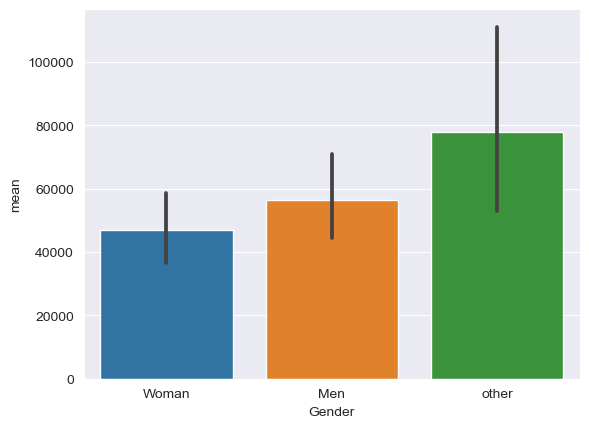

In [122]:
sns.barplot(x= 'Gender', y='mean', data=new_df)

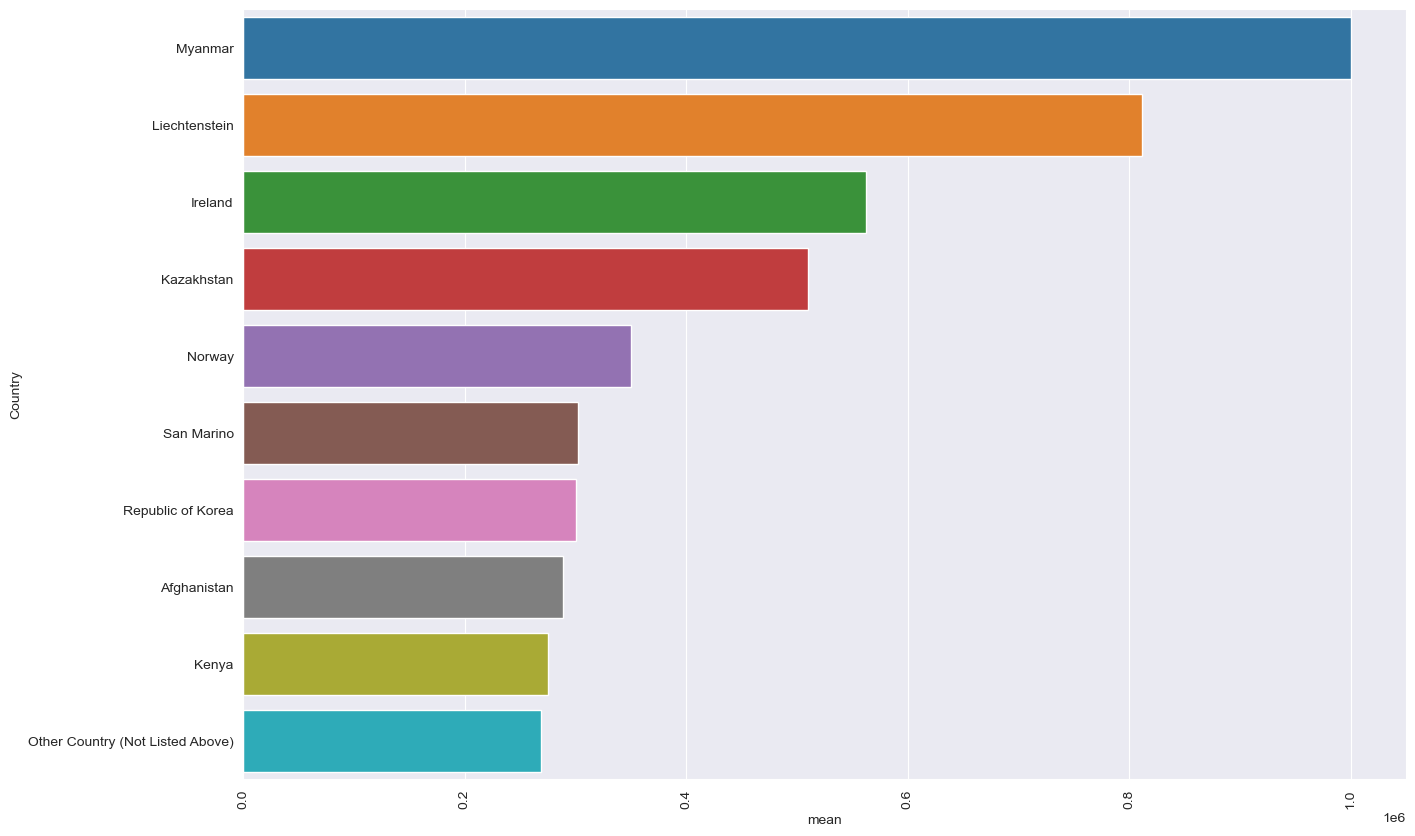

In [124]:
new2 = new_df.sort_values(by='mean', ascending=False).head(10)
plt.figure(figsize=(15,10))
sns.barplot(x='mean', y='Country', data=new2)
plt.xticks(rotation=90)
plt.show()

#### Question no 04 :Top ten countries salary according yearsCode

In [135]:
df.replace(np.nan, None, inplace=True)
df.YearsCode.unique()

array(['4', None, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 'Less than 1 year', '30', '9', '26', '40', '19',
       '15', '20', '28', '25', '1', '22', '11', '33', '50', '41', '18',
       '34', '24', '23', '42', '27', '21', '36', '32', '39', '38', '31',
       '37', 'More than 50 years', '29', '44', '45', '48', '46', '43',
       '47', '49'], dtype=object)

In [136]:
# 1-10 years beginners -> Beginners
# 11-20 years -> Intermediate
# 21-30 -> EXperted
# 31-40 -> ProExperted
# 41-50 -> MaxProExperted

In [137]:
def cleanYearsCode(x):
    if x is not None:
        if x=='Less than 1 year':
            return float(0)
        elif x=='More than 50 years':
            return float(50)
        else:
            return float(x)
    return None
    
df.YearsCode = df.YearsCode.apply(cleanYearsCode)


In [138]:
df.sample(5)

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
81174,I code primarily as a hobby,Yes,United States,6.0,None,Bash/Shell/PowerShell;C++;Clojure;HTML/CSS;Jav...,YouTube,19.0,Man
81195,I am a developer by profession,Yes,Poland,9.0,16032.0,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,Facebook,23.0,Man
27693,I am a developer by profession,Yes,Belgium,17.0,43656.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Python,YouTube,29.0,"Non-binary, genderqueer, or gender non-conforming"
82732,I am a student who is learning to code,Yes,United States,4.0,None,HTML/CSS;JavaScript;SQL,YouTube,None,Man
81506,I am a developer by profession,Yes,Iran,9.0,None,C#;Go;HTML/CSS;JavaScript;SQL;TypeScript,Instagram,None,None


In [139]:
def modifyYearsCode(x):
    if (x>=0  and x<=10):
        return "Beginners"
    elif (x>=11 and x<=20):
        return 'Intermediate'
    elif (x>=21 and x<=30):
        return "Expert"
    elif (x>=31 and x<= 40):
        return 'ProExpert'
    else:
        return "ProMaxExpert"
df.YearsCode = df.YearsCode.apply(modifyYearsCode)


In [140]:
df.YearsCode.value_counts()

YearsCode
Beginners       52107
Intermediate    23395
Expert           7874
ProExpert        3811
ProMaxExpert     1696
Name: count, dtype: int64

In [147]:
df.dtypes

MainBranch             object
Hobbyist               object
Country                object
YearsCode              object
salary                float64
LanguageWorkedWith     object
SocialMedia            object
Age                    object
Gender                 object
dtype: object

In [146]:
df.salary = df.salary.astype(float)

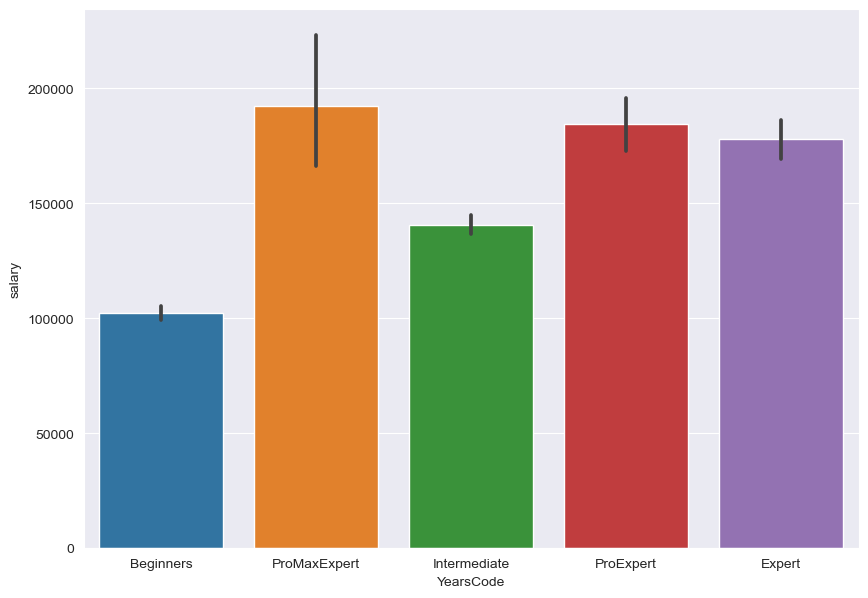

In [148]:
plt.figure(figsize=(10,7))
sns.barplot(x='YearsCode', y=df.salary, data=df)
plt.show()

In [149]:
df['YearsCode']

Respondent
1           Beginners
2        ProMaxExpert
3           Beginners
4           Beginners
5        Intermediate
             ...     
88377    ProMaxExpert
88601    ProMaxExpert
88802    ProMaxExpert
88816    ProMaxExpert
88863       Beginners
Name: YearsCode, Length: 88883, dtype: object

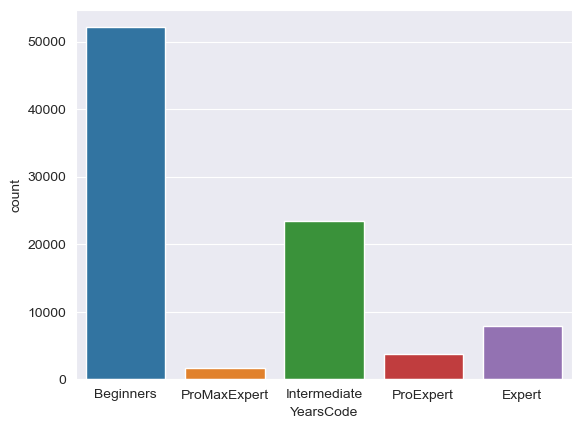

In [150]:
sns.countplot(data=df, x=df['YearsCode'])
plt.show()

In [ ]:
# df[['Country','YearsCode','salary']].sort_values(by=df.Country.value_counts())

In [151]:
df.Country.value_counts().head(15)

Country
United States         20949
India                  9061
Germany                5866
United Kingdom         5737
Canada                 3395
France                 2391
Brazil                 1948
Poland                 1922
Australia              1903
Netherlands            1852
Russian Federation     1694
Spain                  1604
Italy                  1576
Sweden                 1274
Switzerland             978
Name: count, dtype: int64

In [152]:
df['YearsCode'].dtype

dtype('O')

In [153]:
df1 = df.groupby('Country')[['YearsCode','salary']].value_counts().reset_index().sort_values(by='salary', ascending=False).head(10)

In [154]:
df1.groupby('Country')[['YearsCode','salary']].value_counts()

Country         YearsCode     salary   
Canada          Beginners     2000000.0    1
Germany         Beginners     2000000.0    1
India           Beginners     2000000.0    1
Peru            Expert        2000000.0    1
Singapore       Intermediate  2000000.0    1
Switzerland     Intermediate  2000000.0    1
United Kingdom  ProMaxExpert  2000000.0    1
United States   Beginners     2000000.0    1
                Expert        2000000.0    1
                ProMaxExpert  2000000.0    1
Name: count, dtype: int64

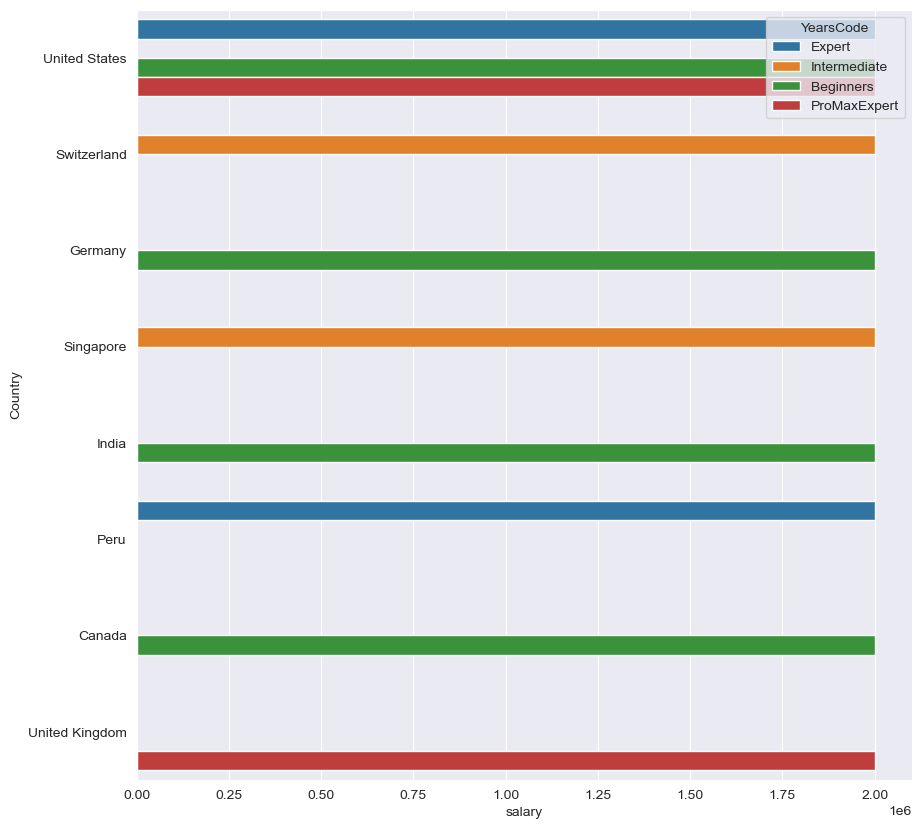

In [155]:
plt.figure(figsize=(10,10))
sns.barplot(y='Country',x='salary',hue='YearsCode', data=df1)
plt.show()

## Practice Exercise 01

#### Step 1. Import the necessary libraries

#### Step 2. Assign it to a variable called drinks.

In [ ]:
drinks = pd.read_csv('datasets/drinks.csv')
drinks.head()

In [ ]:
drinks.info()

#### Step 4. Which continent drinks more beer on average?

List of all continets
```
Asia 
Africa 
Europe 
North America 
South America
Australia/Oceania 
Antarctica
```

In [ ]:
drinks.columns

In [ ]:
drinks.continent.value_counts()

In [ ]:
drinks.groupby('continent').agg({'beer_servings':'mean'}).sort_values(by='beer_servings')

#### Step 5. For each continent print the statistics for wine consumption.

In [ ]:
# df.groupby('')
drinks.columns

In [ ]:
# drinks[['continent','wine_servings']]
drinks.groupby('continent')['wine_servings'].describe()

#### Step 6. Print the mean alcohol consumption per continent for every column

In [ ]:
drinks.columns

In [ ]:
drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

#### Step 7. Print the median alcohol consumption per continent for every column

In [ ]:
drinks.groupby('continent')['total_litres_of_pure_alcohol'].median()

In [ ]:
drinks.columns

#### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [ ]:
drinks.groupby('continent').agg({'spirit_servings':['mean','min','max']})

In [1]:
from IPython.core.display import HTML

style = """
    <style>
        body {
            background-color: #f2fff2;
        }
        h1 {
            text-align: center;
            font-weight: bold;
            font-size: 36px;
            color: #4295F4;
            text-decoration: underline;
            padding-top: 15px;
        }
        
        h2 {
            text-align: left;
            font-weight: bold;
            font-size: 30px;
            color: #4A000A;
            text-decoration: underline;
            padding-top: 10px;
        }
        
        h3 {
            text-align: left;
            font-weight: bold;
            font-size: 30px;
            color: #f0081e;
            text-decoration: underline;
            padding-top: 5px;
        }

        
        p {
            text-align: center;
            font-size: 12 px;
            color: #0B9923;
        }
    </style>
"""

html_content = """
<h1>Hello</h1>
<p>Hello World</p>
<h2> Hello</h2>
<h3> World </h3>
"""

HTML(style + html_content)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 852.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.3/657.3 kB 3.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bdd532d0fd02136808bdb9a372aef5b1502c0f4e574ad4025b4d788058152f5b
  Stored in directory: /Users/ehtishamsadiq/Library/Caches/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninsta